# Install geneinfo and ipympl

In [5]:
#! conda install --yes -c kaspermunch -c conda-forge ipympl geneinfo=3

# Libraries

In [6]:
import sys, os
from collections import defaultdict
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina', 'png')
import seaborn as sns
sns.set_style('white')

import geneinfo as gi
gi.email('your@email.com')

# Set proxies if running on the cluster

In [22]:
%env http_proxy=http://proxyserv:3128
%env ftp_proxy=http://proxyserv:3128
%env https_proxy=http://proxyserv:3128

env: http_proxy=http://proxyserv:3128
env: ftp_proxy=http://proxyserv:3128
env: https_proxy=http://proxyserv:3128


# Choose whether you want to plot with  widget (allows zoom, pan etc)

In [4]:
# %matplotlib widget

In [8]:
olive_south_ancestry = pd.read_csv("../data/mean_ancestry_tanzania_olives.txt")

In [9]:
olive_south_ancestry

,anubis_ethiopia,cyno_western,hamadryas,kindae,papio,ursinus,north,norm_north,start,south_percentage,end,pos
0,6.569757e+05,984807.106977,237136.246512,42981.051163,67959.804651,10140.139535,9.620717e+05,-37928.297674,2800022.0,0.518964,2900021.0,2800022.0
1,6.569757e+05,984807.106977,237136.246512,42981.051163,67959.804651,10140.139535,9.620717e+05,-37928.297674,2800022.0,0.518964,2900021.0,2900021.0
2,7.380863e+05,909155.051163,202621.962791,62158.376744,79875.930233,8102.334884,1.020584e+06,20584.237209,2900022.0,0.489708,3000021.0,2900022.0
3,7.380863e+05,909155.051163,202621.962791,62158.376744,79875.930233,8102.334884,1.020584e+06,20584.237209,2900022.0,0.489708,3000021.0,3000021.0
4,6.831022e+05,803762.758140,197602.176744,85322.004651,211955.413953,18255.409302,1.092660e+06,92659.827907,3000022.0,0.453670,3100021.0,3000022.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2809,1.040977e+06,609135.502326,223914.832558,305.986047,124183.995349,1482.237209,1.389076e+06,389076.274419,143200022.0,0.305462,143300021.0,143300021.0
2810,9.117668e+05,806543.534884,162330.479070,259.986047,117622.446512,1476.711628,1.191720e+06,191719.767442,143300022.0,0.404140,143400021.0,143300022.0
2811,9.117668e+05,806543.534884,162330.479070,259.986047,117622.446512,1476.711628,1.191720e+06,191719.767442,143300022.0,0.404140,143400021.0,143400021.0
2812,8.751584e+05,843586.641860,172759.688372,4680.530233,62390.693023,7600.060465,1.110309e+06,127220.767442,143400022.0,0.444846,143500021.0,143400022.0


In [11]:
idfile_path = "/home/eriks/baboondiversity/data/PG_panu3_phased_chromosomes_4_7_2021/idfile_7_cluster_females.ids"
idfile = pd.read_csv(idfile_path, sep=" ", names=["PGDP_ID", "pop", "inclusion"])
idfile["ID_index"] = idfile.index
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
mapping = {}
for i, row in meta_data_samples.iterrows():
    if row.PGDP_ID[0] != "P":
        mapping["Sci_"+row.PGDP_ID] = row.Origin
    else:
        mapping[row.PGDP_ID] = row.Origin

In [12]:
df_l = []
baboon_path = "/home/eriks/baboondiversity/people/eriks/baboon_first_analysis"
for population in ['cyno_anubis_t']:
    for chrom in ["8", "X"]:
        for ind in idfile.loc[(idfile["pop"] == population) & (idfile.inclusion == 1)].PGDP_ID:
            name = population+"_chr"+chrom+"_7_cluster_"+ind+".txt"
            ind_df = pd.read_csv(baboon_path+"/steps/paint_summary/"+name, sep=" ")
            ind_df["PGDP_ID"] = ind
            ind_df["chrom"] = chrom
            df_l.append(ind_df)
a_7_df = pd.concat(df_l)
a_7_df["north"] = a_7_df.anubis_ethiopia+a_7_df.hamadryas+a_7_df.papio
a_7_df["norm_north"] = (a_7_df.north-a_7_df.iloc[:,1:8].sum(axis=1)/2)
a_7_df["percent_north"] = (a_7_df.north/a_7_df.iloc[:,1:8].sum(axis=1))
a_7_df["pop"] = a_7_df["PGDP_ID"].map(mapping)
a_7_df["start"] = a_7_df["windows"]

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]
/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [13]:
olives = meta_data_samples.loc[meta_data_samples.Species == "anubis"].PGDP_ID
olives
yellows = meta_data_samples.loc[meta_data_samples.Species == "cynocephalus"].PGDP_ID
yellows

0        16066
1        16098
24     PD_0213
25     PD_0214
26     PD_0215
        ...   
203    PD_0771
204    PD_0772
205    PD_0773
206    PD_0774
207    PD_0775
Name: PGDP_ID, Length: 62, dtype: object

In [14]:
chrX_df_olive = a_7_df.loc[(a_7_df.chrom == "X") & (a_7_df.PGDP_ID.isin(olives)
                                                    & (a_7_df["pop"] == "Serengeti, Tanzania"))]
chrX_df_yellow = a_7_df.loc[(a_7_df.chrom == "X") & (a_7_df.PGDP_ID.isin(yellows)
                                                    & (a_7_df["pop"].isin(['Udzungwa, Tanzania', 'Selous, Tanzania'])))]
yellow_mean = chrX_df_yellow.groupby(["windows"]).mean()
olive_mean = chrX_df_olive.groupby(["windows"]).mean()

[Text(0, 0.5, 'Ancestry')]

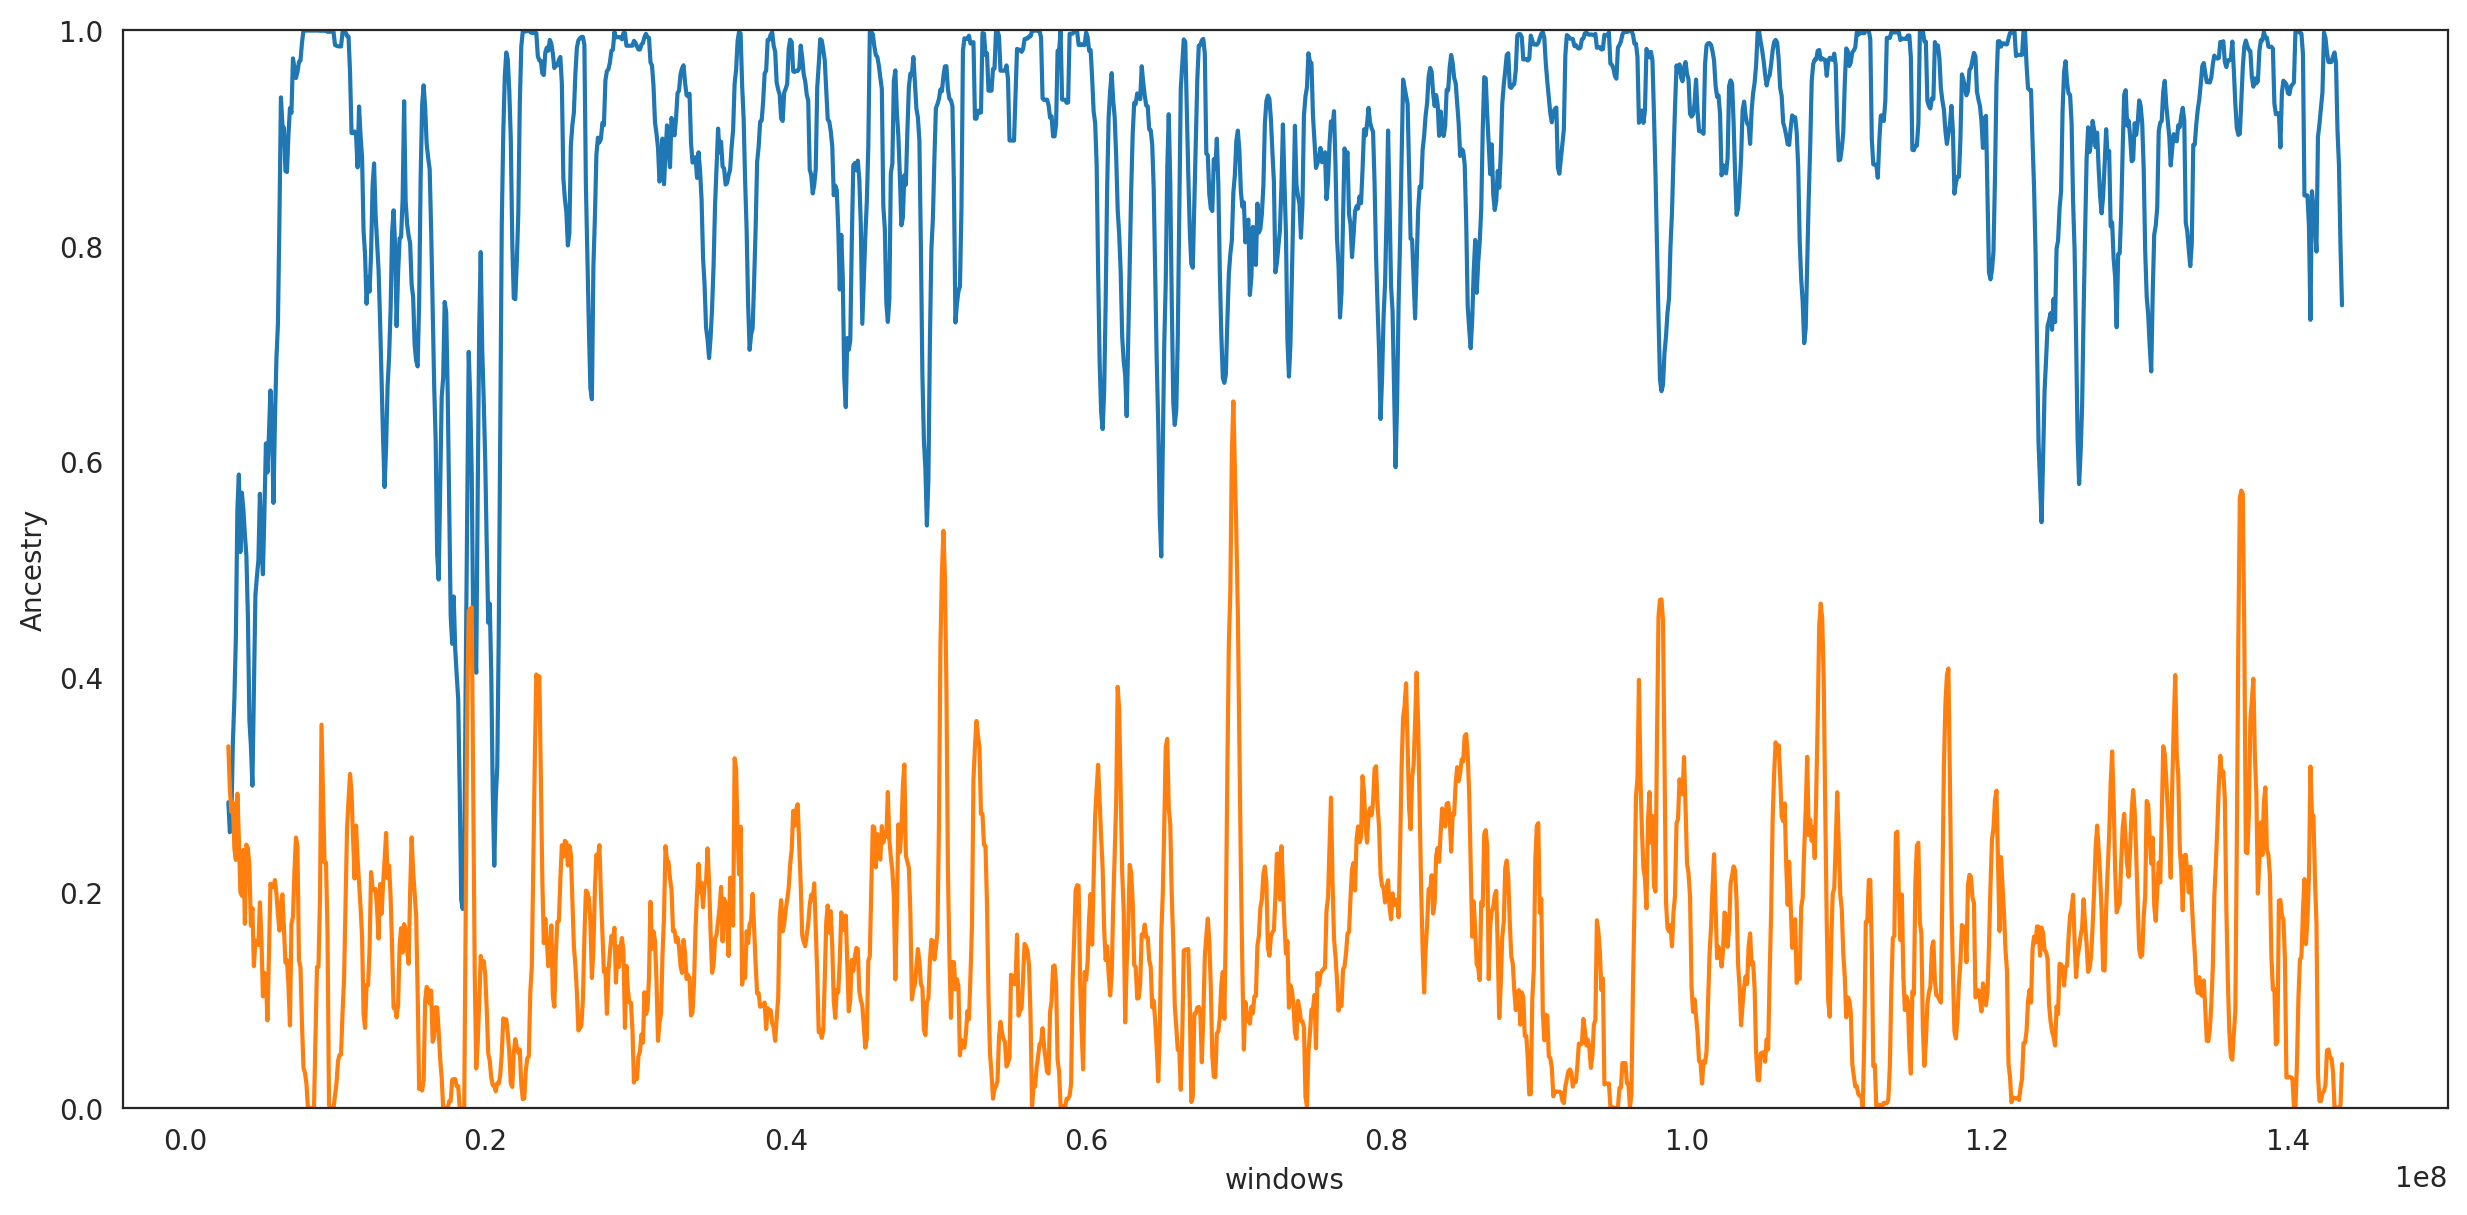

In [15]:
roll_size = 5
plt.figure(figsize=(15,7))
g = sns.lineplot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
g = sns.lineplot(data=yellow_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
g.set(ylim=(-0.0001,1.0001))
g.set(ylabel="Ancestry")

In [16]:
chrX_df_olive.loc[chrX_df_olive.windows == 7800022]

,windows,anubis_ethiopia,cyno_western,hamadryas,kindae,papio,ursinus,PGDP_ID,chrom,north,norm_north,percent_north,pop,start
53,7800022,2000000.0,0.0,0.0,0.0,0.0,0.0,PD_0199,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7800022
53,7800022,2000000.0,0.0,0.0,0.0,0.0,0.0,PD_0200,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7800022
53,7800022,2000000.0,0.0,0.0,0.0,0.0,0.0,PD_0203,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7800022
53,7800022,2000000.0,0.0,0.0,0.0,0.0,0.0,PD_0495,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7800022
53,7800022,2000000.0,0.0,0.0,0.0,0.0,0.0,PD_0499,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7800022
53,7800022,1229174.0,0.0,770826.0,0.0,0.0,0.0,PD_0500,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7800022
53,7800022,1148633.0,0.0,851367.0,0.0,0.0,0.0,PD_0501,X,2000000.0,1000000.0,1.0,"Serengeti, Tanzania",7800022


In [17]:
total_df = pd.merge(olive_mean, yellow_mean, on="start")

In [18]:
total_df

,anubis_ethiopia_x,cyno_western_x,hamadryas_x,kindae_x,papio_x,ursinus_x,north_x,norm_north_x,percent_north_x,start,anubis_ethiopia_y,cyno_western_y,hamadryas_y,kindae_y,papio_y,ursinus_y,north_y,norm_north_y,percent_north_y
0,7.660386e+04,1.135664e+06,457810.000000,69426.428571,20206.000000,240289.571429,5.546199e+05,-445380.142857,0.277310,2500022.0,86078.75,316253.25,573569.25,529597.75,15432.25,479068.75,675080.25,-324919.75,0.337540
1,2.607429e+03,1.578100e+06,317781.857143,61477.000000,22554.142857,17480.000000,3.429434e+05,-657056.571429,0.171472,2600022.0,37224.00,54420.50,763772.00,816171.75,10912.00,317499.75,811908.00,-188092.00,0.405954
2,8.457720e+05,8.442141e+05,299002.714286,7627.142857,3373.571429,10.428571,1.148148e+06,148148.285714,0.574074,2700022.0,581339.00,667702.25,156260.50,492337.50,81133.25,21227.50,818732.75,-181267.25,0.409366
3,2.010074e+05,1.411699e+06,319058.142857,67976.571429,258.571429,0.000000,5.203241e+05,-479675.857143,0.260162,2800022.0,342029.75,660531.25,313407.75,98948.00,13618.75,571464.50,669056.25,-330943.75,0.334528
4,2.033103e+05,1.725863e+06,1341.571429,115.571429,69345.714286,23.571429,2.739976e+05,-726002.428571,0.136999,2900022.0,62316.25,607876.50,307041.50,396365.25,15254.75,611145.75,384612.50,-615387.50,0.192306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1.369667e+06,1.811914e+05,202736.857143,0.000000,243216.285714,3188.142857,1.815620e+06,815620.428571,0.907810,143200022.0,902.25,1379392.50,0.00,618857.25,848.00,0.00,1750.25,-998249.75,0.000875
1408,1.160356e+06,6.358647e+05,98409.857143,0.000000,105369.142857,0.000000,1.364135e+06,364135.285714,0.682068,143300022.0,0.00,442110.75,0.00,1557889.25,0.00,0.00,0.00,-1000000.00,0.000000
1409,1.352251e+06,3.245489e+05,321016.428571,805.285714,893.571429,484.857143,1.674161e+06,674161.000000,0.837081,143400022.0,2636.25,921488.25,162.50,1075613.00,100.00,0.00,2898.75,-997101.25,0.001449
1410,1.251802e+06,7.481979e+05,0.000000,0.000000,0.000000,0.000000,1.251802e+06,251802.142857,0.625901,143500022.0,24304.00,1663746.75,232.25,311263.25,283.50,170.25,24819.75,-975180.25,0.012410


In [19]:
list(total_df.loc[(total_df.percent_north_x > 0.99) & (total_df.percent_north_y < 0.01)].start)

[7800022.0,
 7900022.0,
 8000022.0,
 8100022.0,
 8200022.0,
 8300022.0,
 8400022.0,
 8500022.0,
 8600022.0,
 8900022.0,
 9300022.0,
 9400022.0,
 9500022.0,
 9600022.0,
 9700022.0,
 9800022.0,
 9900022.0,
 10400022.0,
 22100022.0,
 22200022.0,
 22400022.0,
 22500022.0,
 22600022.0,
 26200022.0,
 28900022.0,
 29200022.0,
 29500022.0,
 29700022.0,
 29800022.0,
 30700022.0,
 36500022.0,
 36900022.0,
 39000022.0,
 39100022.0,
 42000022.0,
 42100022.0,
 45200022.0,
 51500022.0,
 51800022.0,
 53400022.0,
 53600022.0,
 54400022.0,
 54500022.0,
 54600022.0,
 55100022.0,
 56000022.0,
 56100022.0,
 56200022.0,
 56300022.0,
 56400022.0,
 56600022.0,
 57200022.0,
 57300022.0,
 57400022.0,
 57900022.0,
 58000022.0,
 58100022.0,
 58200022.0,
 58300022.0,
 58500022.0,
 58600022.0,
 58800022.0,
 59700022.0,
 66100022.0,
 66200022.0,
 66300022.0,
 67300022.0,
 67500022.0,
 74600022.0,
 74700022.0,
 86100022.0,
 88300022.0,
 89200022.0,
 89600022.0,
 90400022.0,
 91600022.0,
 91700022.0,
 92300022.0,
 92

In [20]:
total_df

,anubis_ethiopia_x,cyno_western_x,hamadryas_x,kindae_x,papio_x,ursinus_x,north_x,norm_north_x,percent_north_x,start,anubis_ethiopia_y,cyno_western_y,hamadryas_y,kindae_y,papio_y,ursinus_y,north_y,norm_north_y,percent_north_y
0,7.660386e+04,1.135664e+06,457810.000000,69426.428571,20206.000000,240289.571429,5.546199e+05,-445380.142857,0.277310,2500022.0,86078.75,316253.25,573569.25,529597.75,15432.25,479068.75,675080.25,-324919.75,0.337540
1,2.607429e+03,1.578100e+06,317781.857143,61477.000000,22554.142857,17480.000000,3.429434e+05,-657056.571429,0.171472,2600022.0,37224.00,54420.50,763772.00,816171.75,10912.00,317499.75,811908.00,-188092.00,0.405954
2,8.457720e+05,8.442141e+05,299002.714286,7627.142857,3373.571429,10.428571,1.148148e+06,148148.285714,0.574074,2700022.0,581339.00,667702.25,156260.50,492337.50,81133.25,21227.50,818732.75,-181267.25,0.409366
3,2.010074e+05,1.411699e+06,319058.142857,67976.571429,258.571429,0.000000,5.203241e+05,-479675.857143,0.260162,2800022.0,342029.75,660531.25,313407.75,98948.00,13618.75,571464.50,669056.25,-330943.75,0.334528
4,2.033103e+05,1.725863e+06,1341.571429,115.571429,69345.714286,23.571429,2.739976e+05,-726002.428571,0.136999,2900022.0,62316.25,607876.50,307041.50,396365.25,15254.75,611145.75,384612.50,-615387.50,0.192306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1.369667e+06,1.811914e+05,202736.857143,0.000000,243216.285714,3188.142857,1.815620e+06,815620.428571,0.907810,143200022.0,902.25,1379392.50,0.00,618857.25,848.00,0.00,1750.25,-998249.75,0.000875
1408,1.160356e+06,6.358647e+05,98409.857143,0.000000,105369.142857,0.000000,1.364135e+06,364135.285714,0.682068,143300022.0,0.00,442110.75,0.00,1557889.25,0.00,0.00,0.00,-1000000.00,0.000000
1409,1.352251e+06,3.245489e+05,321016.428571,805.285714,893.571429,484.857143,1.674161e+06,674161.000000,0.837081,143400022.0,2636.25,921488.25,162.50,1075613.00,100.00,0.00,2898.75,-997101.25,0.001449
1410,1.251802e+06,7.481979e+05,0.000000,0.000000,0.000000,0.000000,1.251802e+06,251802.142857,0.625901,143500022.0,24304.00,1663746.75,232.25,311263.25,283.50,170.25,24819.75,-975180.25,0.012410


ProxyError: HTTPSConnectionPool(host='api.genome.ucsc.edu', port=443): Max retries exceeded with url: /getData/track (Caused by ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x2b0499b36690>: Failed to establish a new connection: [Errno 111] Connection refused')))

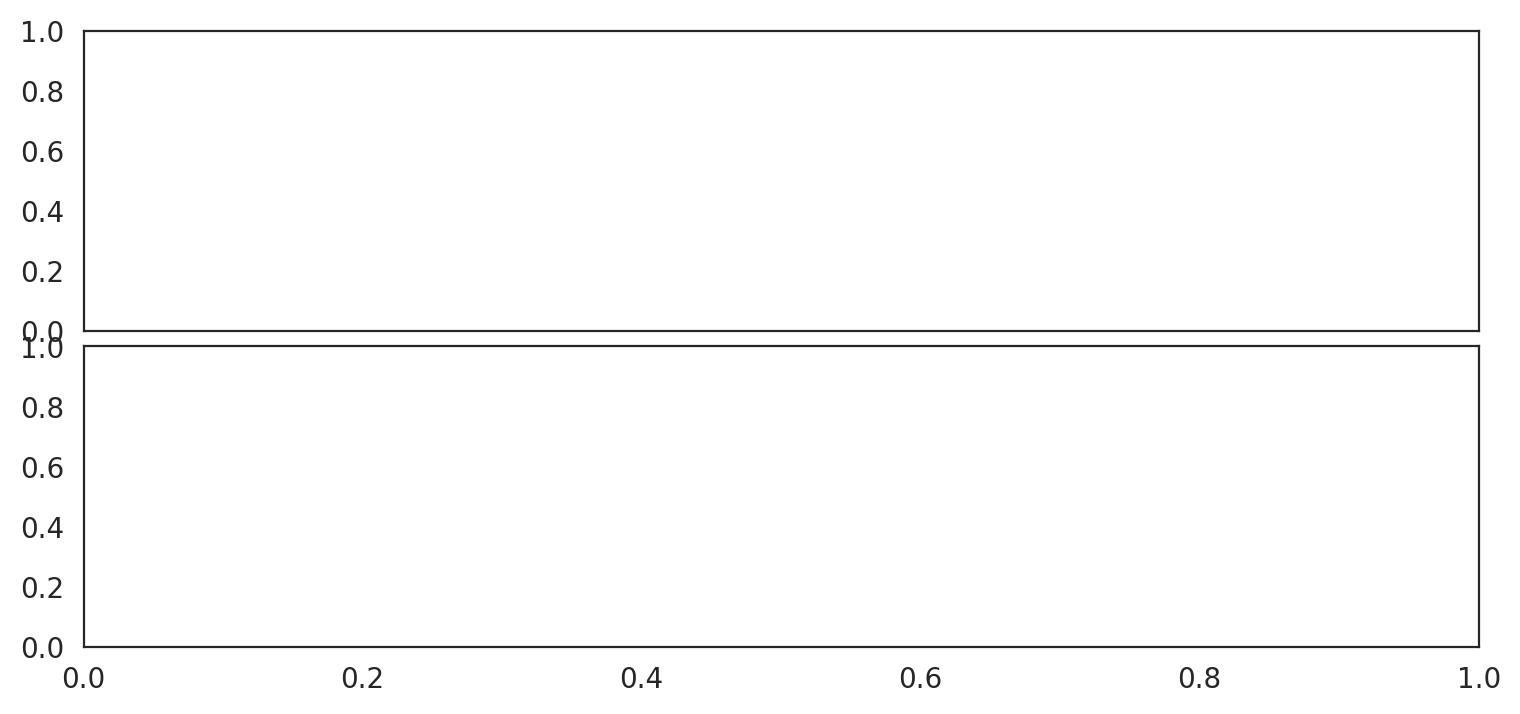

In [23]:
ax = gi.gene_plot('chrX', 65000000, 69000000, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(mikumi.pos, mikumi["n/s"])
ax.plot(tarangire.pos, tarangire["n/s"])
plt.tight_layout()

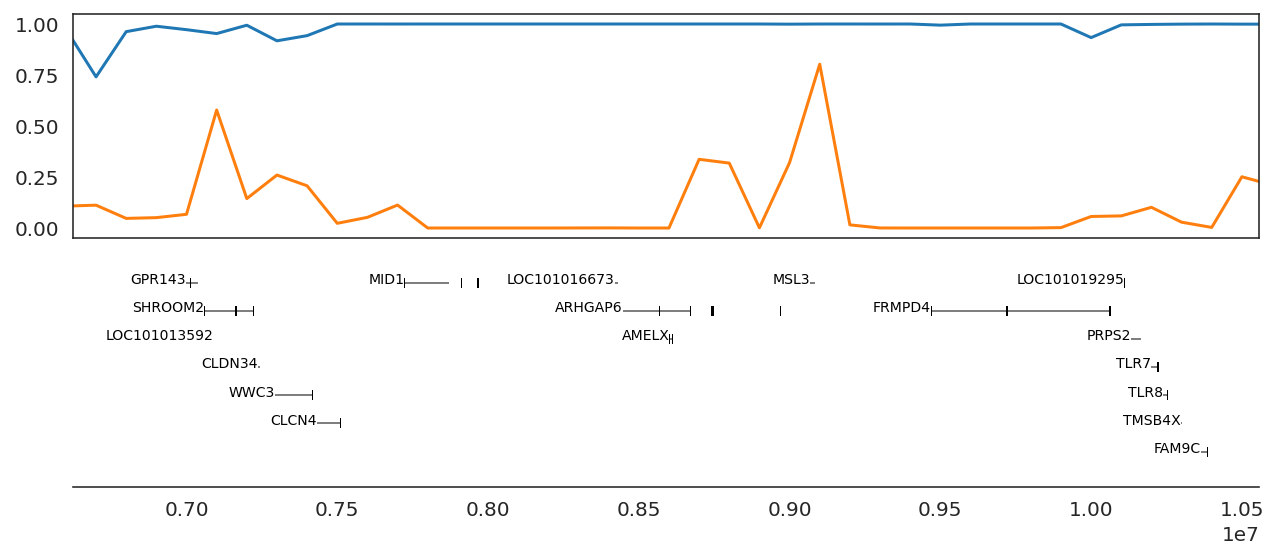

In [18]:
ax = gi.gene_plot('chrX', 7000022, 10500022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

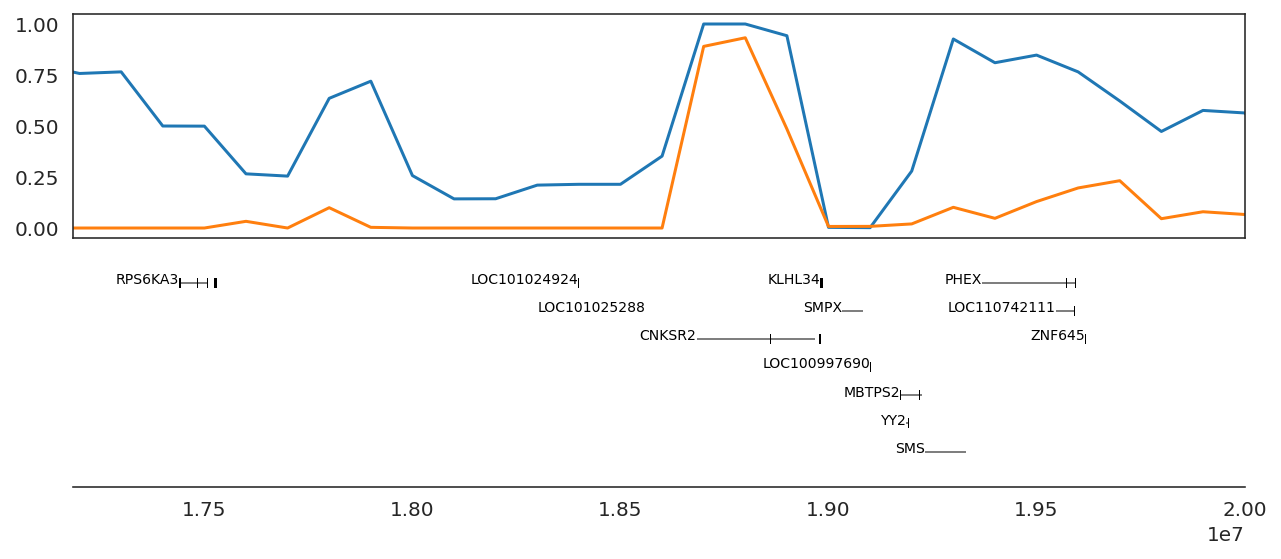

In [19]:
ax = gi.gene_plot('chrX', 17500022, 20000022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

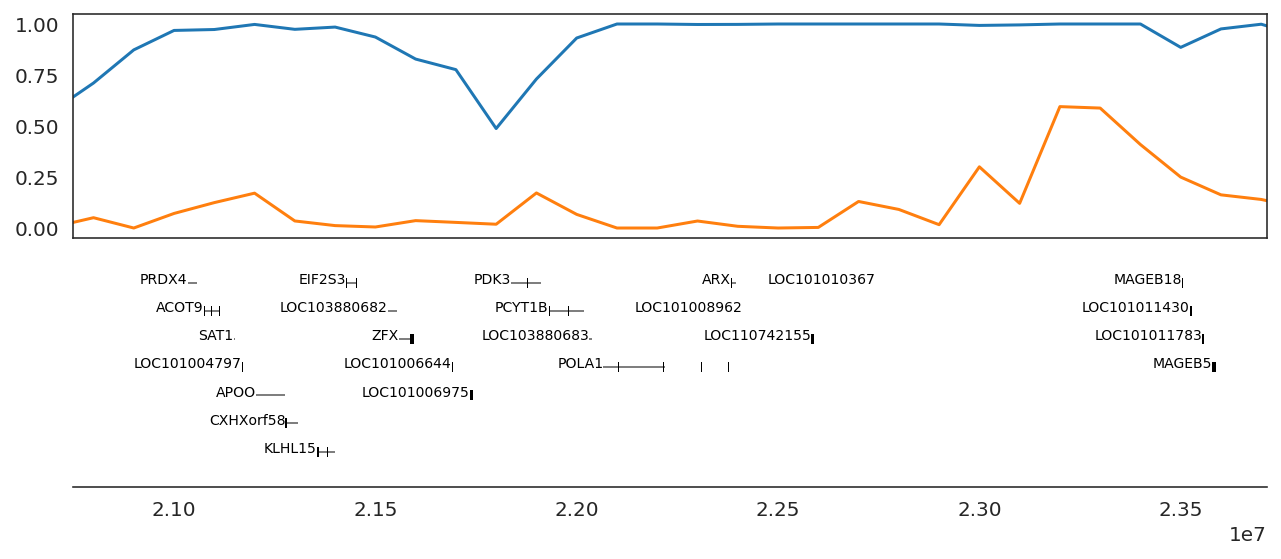

In [20]:
ax = gi.gene_plot('chrX', 21000022, 23700022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

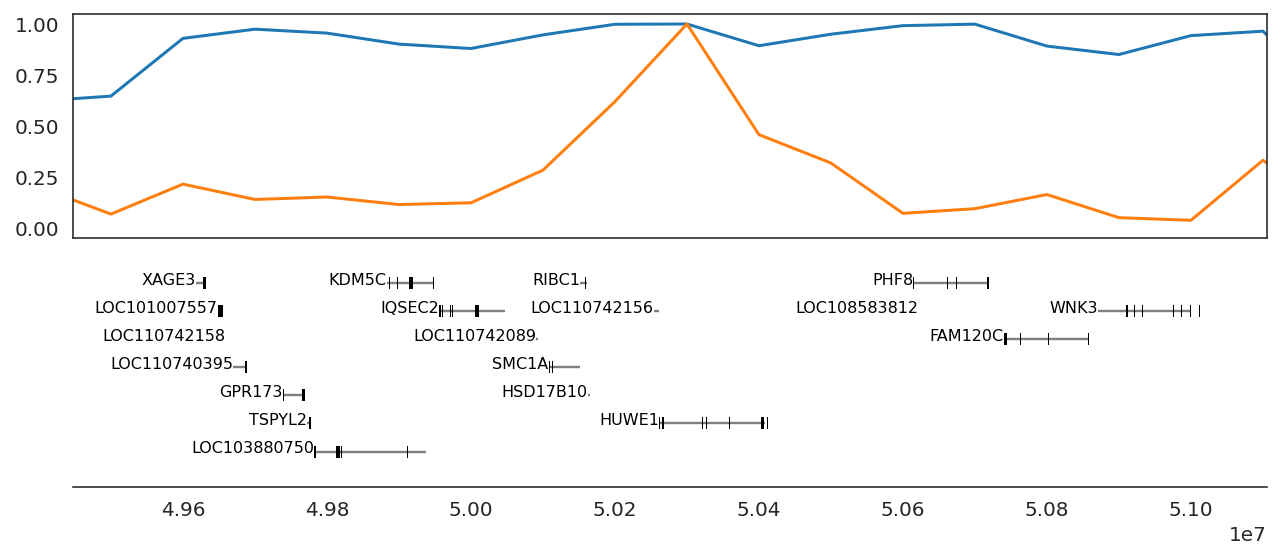

In [21]:
ax = gi.gene_plot('chrX', 49600022, 51100022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

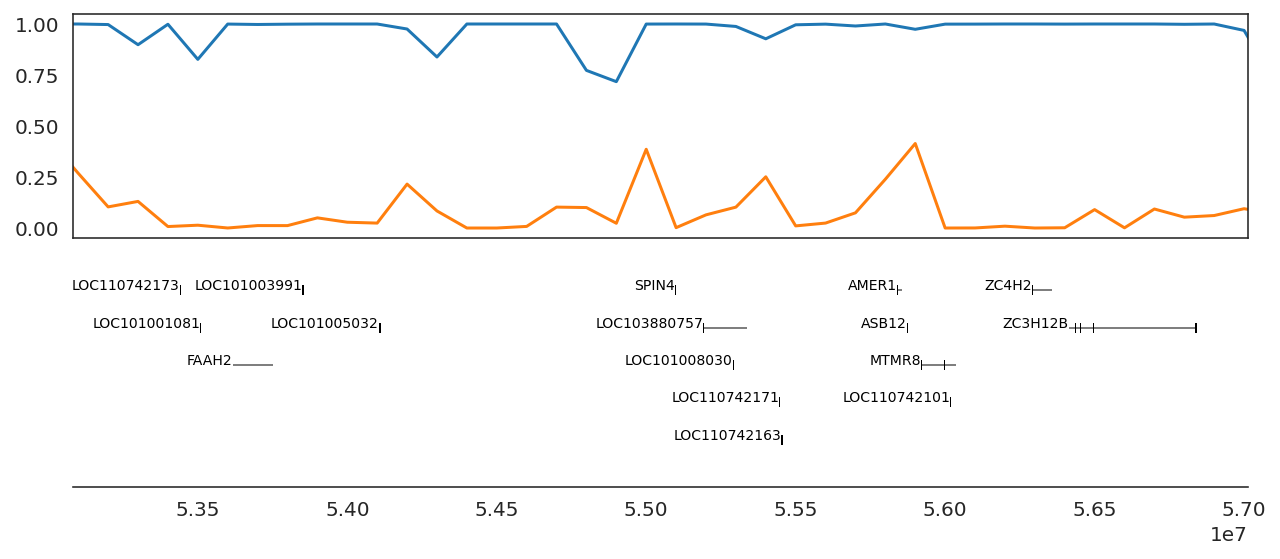

In [22]:
ax = gi.gene_plot('chrX', 53400022, 56600022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

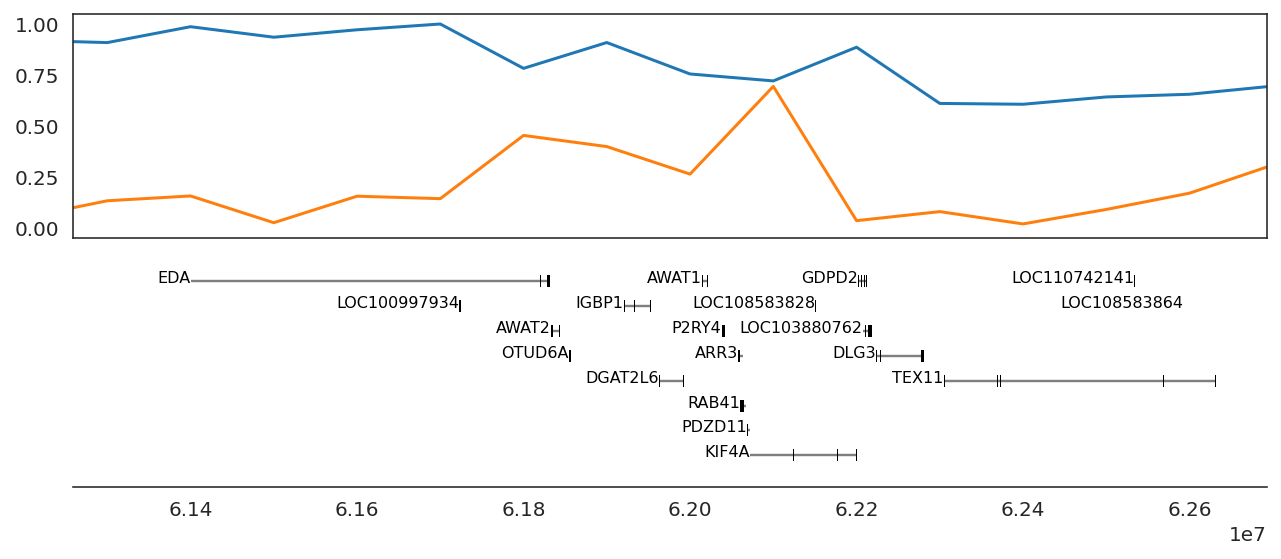

In [23]:
ax = gi.gene_plot('chrX', 61400022, 62600022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

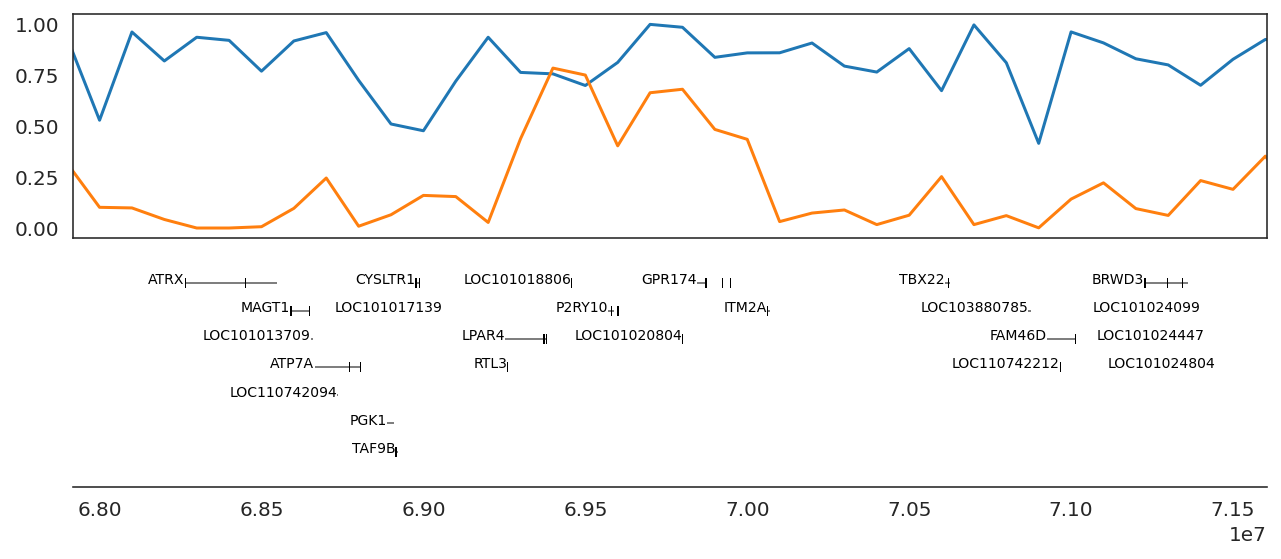

In [24]:
ax = gi.gene_plot('chrX', 68400022, 71600022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

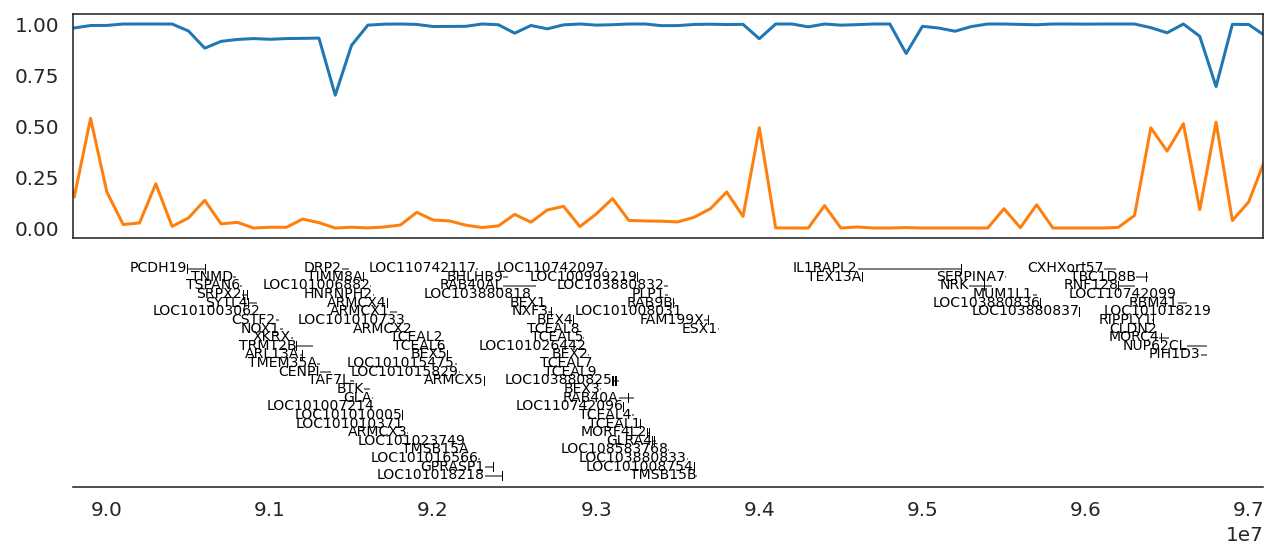

In [25]:
ax = gi.gene_plot('chrX', 90400022, 97000022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

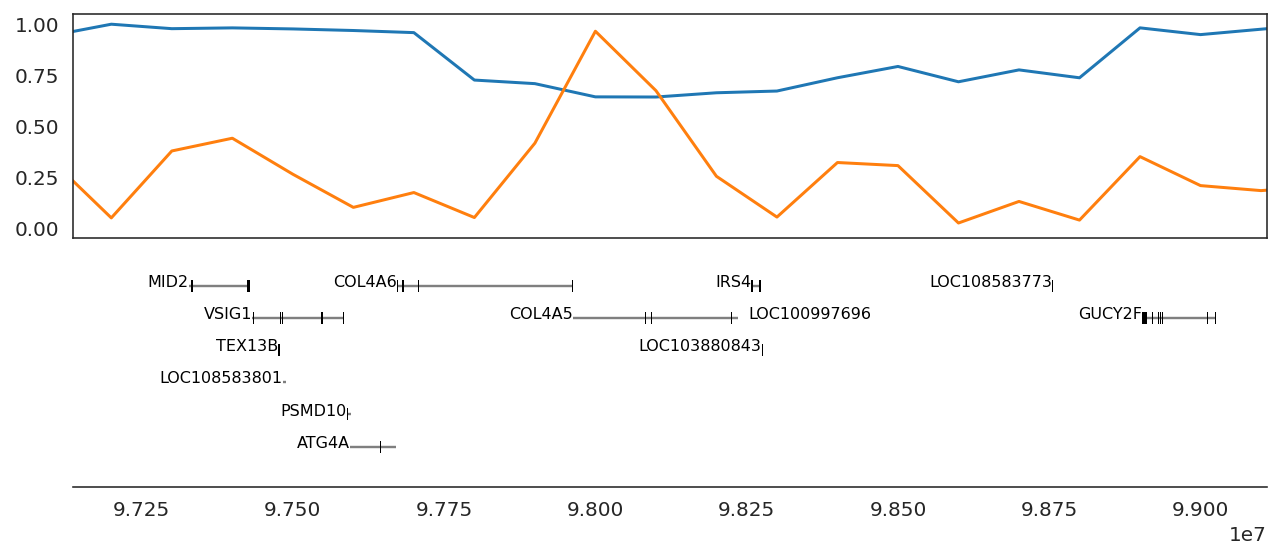

In [26]:
ax = gi.gene_plot('chrX', 97400022, 99000022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

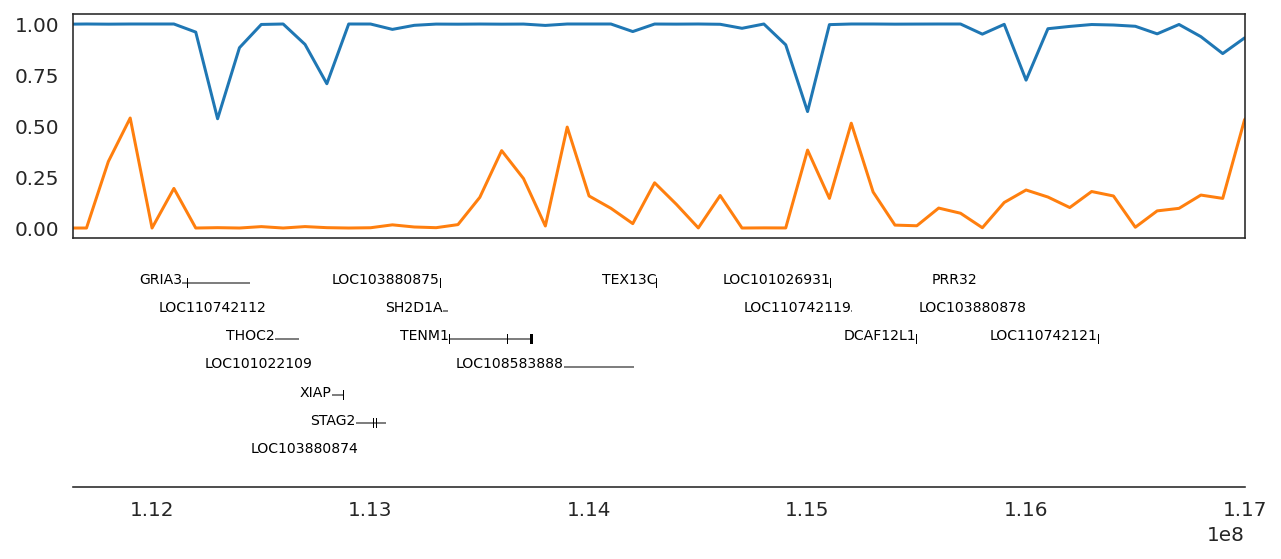

In [27]:
ax = gi.gene_plot('chrX', 112000022, 117000022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

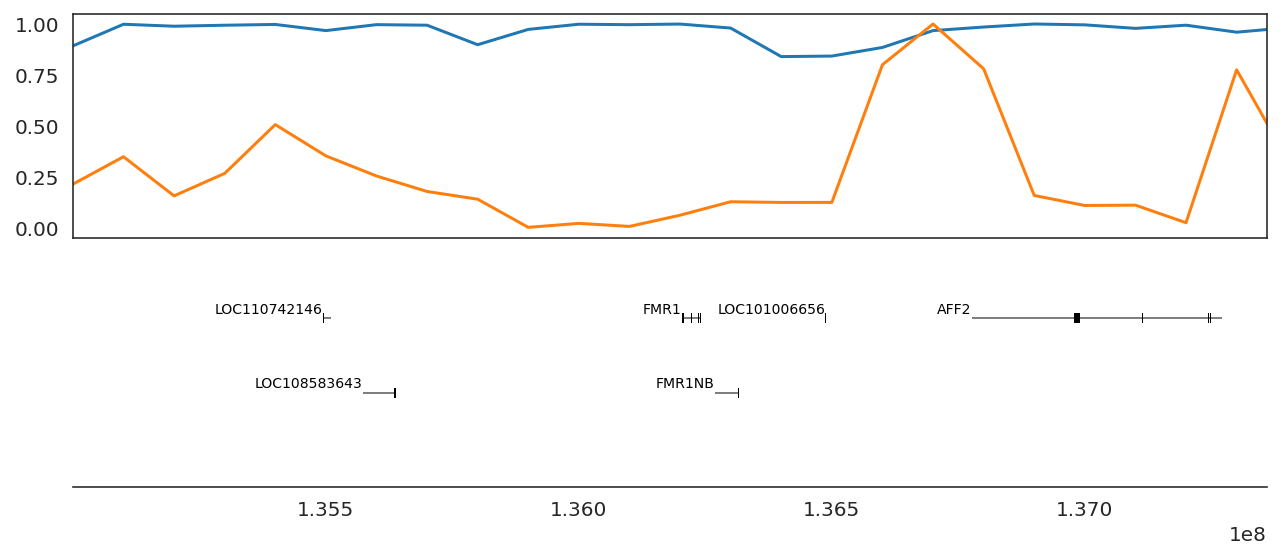

In [28]:
ax = gi.gene_plot('chrX', 135000022, 137000022, assembly='papAnu4', exact_exons=True, figsize=(9, 4))
roll_size = 1
#ax.plot(data=olive_mean.rolling(roll_size).mean(), x="windows", y="percent_north")
ax.plot(olive_mean.rolling(roll_size).mean().start, olive_mean.rolling(roll_size).mean().percent_north)
ax.plot(yellow_mean.rolling(roll_size).mean().start, yellow_mean.rolling(roll_size).mean().percent_north)
plt.tight_layout()

Check of selection

In [24]:
window_size = 100000

relate_sele = pd.read_csv("../results/all_individuals_relate/chromX_selection.sele", sep=" ")

In [25]:
chrX_df = a_7_df.loc[a_7_df.chrom == "X"]
windows = sorted(chrX_df.windows.unique())

In [26]:
window_dir = {}
for i in range(len(windows)-1):
    sub_df = relate_sele.loc[(relate_sele.pos >= windows[i]) & (relate_sele.pos < windows[i+1])]
    window_dir[windows[i]] = sub_df["when_mutation_has_freq2"].min()

In [27]:
chrX_df["sele"] = -chrX_df.windows.map(window_dir)
relate_sele["-log10 P-value"] = -relate_sele["when_mutation_has_freq2"]

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
relate_sele.loc[(relate_sele.pos > 65000000)
                & (relate_sele.pos < 69000000)].sort_values(by= "-log10 P-value")[-20:]

,pos,rs_id,3571428.500000,357142.937500,257030.656250,184981.281250,133128.375000,95810.585938,68953.507812,49624.847656,...,184.981262,133.128357,95.810577,68.953499,49.624844,35.714287,0.000000,when_DAF_is_half,when_mutation_has_freq2,-log10 P-value
494628,67982126,X:67982126:C:T,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.52095,-0.77380,-0.682454,-0.592363,-0.429144,-0.251500,0,-3.04362,-5.19062,5.19062
496620,68190304,X:68190304:A:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-3.30239,-2.69309,-1.018590,-0.432002,-0.661804,-0.450656,0,-2.30004,-5.21496,5.21496
484818,66292334,X:66292334:T:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-4.13921,-2.90303,-2.302800,-1.950810,-0.882141,-0.611795,0,-5.16691,-5.22296,5.22296
483716,66044212,X:66044212:T:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.40547,-1.40303,-1.541910,-1.851000,-0.796677,-0.971754,0,-2.19095,-5.25183,5.25183
496655,68193832,X:68193832:T:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.52267,-2.79731,-2.386550,-1.108100,-1.039410,-0.833347,0,-3.32035,-5.27263,5.27263
494718,67991151,X:67991151:A:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.70134,-1.16722,-1.058120,-0.884994,-0.429144,-0.521271,0,-3.68894,-5.46043,5.46043
494719,67991152,X:67991152:A:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.70134,-1.16722,-1.058120,-0.884994,-0.429144,-0.521271,0,-3.68894,-5.46043,5.46043
485891,66499501,X:66499501:T:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-4.71310,-4.05741,-2.726100,-2.441850,-2.096700,-0.732644,0,-4.34452,-5.50320,5.50320
485962,66508866,X:66508866:T:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-5.41866,-3.80501,-3.203160,-1.907880,-0.925388,-0.968129,0,-5.16456,-5.51701,5.51701
486278,66559980,X:66559980:T:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-3.07245,-3.01311,-2.989100,-2.695520,-2.126840,-0.521216,0,-3.76681,-5.51701,5.51701


In [28]:
relate_sele.loc[(relate_sele.pos > 17500022)
                & (relate_sele.pos < 20000022)].sort_values(by= "-log10 P-value")[-20:]

,pos,rs_id,3571428.500000,357142.937500,257030.656250,184981.281250,133128.375000,95810.585938,68953.507812,49624.847656,...,184.981262,133.128357,95.810577,68.953499,49.624844,35.714287,0.000000,when_DAF_is_half,when_mutation_has_freq2,-log10 P-value
138821,19015759,X:19015759:G:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-3.694200,-2.884770,-2.324560,-1.966320,-1.434740,-1.528900,0,-5.95404,-5.28993,5.28993
133627,18026948,X:18026948:A:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-3.689650,-2.804710,-1.576010,-1.519370,-0.874922,-0.772678,0,-4.89041,-5.30556,5.30556
137874,18823646,X:18823646:A:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-2.509470,-1.704060,-1.222450,-0.903859,-0.629641,-0.091221,0,-3.95664,-5.34275,5.34275
143190,19628654,X:19628654:G:T,1,1.0,1.0,1.0,1.0,1.0,1.0,-4.78424,...,-0.443811,-0.292454,-0.234881,-0.149261,-0.126890,-0.076076,0,-1.34918,-5.48321,5.48321
139687,19165367,X:19165367:C:T,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-2.176060,-1.652410,-1.576010,-1.299520,-0.796053,-0.738095,0,-4.89041,-5.56164,5.56164
140120,19250729,X:19250729:C:T,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-3.422860,-2.834960,-2.263100,-2.340510,-1.000610,-0.271983,0,-4.89041,-5.56164,5.56164
143295,19642990,X:19642990:T:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-3.242490,-1.195170,-0.959217,-0.492085,-0.914558,-0.699950,0,-3.40550,-5.57127,5.57127
140355,19288921,X:19288921:C:T,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-0.400753,-0.243426,-0.406761,-0.376454,-0.541799,-0.296234,0,-2.11238,-5.59441,5.59441
140202,19265925,X:19265925:A:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-1.442590,-1.833840,-1.077780,-0.978428,-0.960362,-0.280133,0,-4.13482,-5.62501,5.62501
135015,18281269,X:18281269:A:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,...,-2.598950,-2.068350,-2.256880,-1.266190,-1.268340,-0.738095,0,-6.09279,-5.82050,5.82050


In [34]:
relate_sele.loc[(relate_sele.pos > 7000022)
                & (relate_sele.pos < 10500022)].sort_values(by= "-log10 P-value")[-20:]

,pos,rs_id,3571428.500000,357142.937500,257030.656250,184981.281250,133128.375000,95810.585938,68953.507812,49624.847656,...,184.981262,133.128357,95.810577,68.953499,49.624844,35.714287,0.000000,when_DAF_is_half,when_mutation_has_freq2,-log10 P-value
70318,9024278,X:9024278:T:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-3.03781,-1.68689,-1.13976,-1.205540,-0.951049,-0.081838,0,-2.69425,-5.92477,5.92477
68762,8697949,X:8697949:A:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.10948,-2.24203,-1.85696,-0.994859,-1.185700,-0.911367,0,-2.41838,-6.02257,6.02257
77467,10263206,X:10263206:T:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-3.07724,-4.07835,-3.46115,-2.174300,-1.484770,-1.484670,0,-3.91119,-6.10345,6.10345
73629,9638165,X:9638165:C:T,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.52059,-2.39175,-1.90872,-1.215970,-2.141620,-0.806676,0,-2.65553,-6.13929,6.13929
62143,7396026,X:7396026:C:T,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.03234,-1.68386,-0.77472,-1.204840,-0.822529,-0.563839,0,-2.94146,-6.13929,6.13929
75684,10005996,X:10005996:T:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.33809,-1.02406,-1.01899,-0.855392,-0.524928,-0.297424,0,-2.31983,-6.18439,6.18439
77115,10221847,X:10221847:T:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.81364,-2.80466,-1.98543,-0.803099,-1.424040,-0.619311,0,-3.78768,-6.18869,6.18869
77116,10221916,X:10221916:C:T,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.81364,-2.80466,-1.98543,-0.803099,-1.424040,-0.619311,0,-3.78768,-6.18869,6.18869
77119,10222192,X:10222192:G:A,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.81364,-2.80466,-1.98543,-0.803099,-1.424040,-0.619311,0,-3.78768,-6.18869,6.18869
77132,10223901,X:10223901:T:G,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.81364,-2.80466,-1.98543,-0.803099,-1.424040,-0.619311,0,-3.78768,-6.18869,6.18869


In [35]:
relate_sele.loc[(relate_sele.pos > 90400022)
                & (relate_sele.pos < 97000022)].sort_values(by= "-log10 P-value")[-20:]

,pos,rs_id,3571428.500000,357142.937500,257030.656250,184981.281250,133128.375000,95810.585938,68953.507812,49624.847656,...,184.981262,133.128357,95.810577,68.953499,49.624844,35.714287,0.000000,when_DAF_is_half,when_mutation_has_freq2,-log10 P-value
710583,90527608,X:90527608:G:A,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.95711,-0.730236,-1.143130,-1.493020,-0.532124,0.000000,0,-2.39717,-5.06144,5.06144
746299,96818651,X:96818651:G:A,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.59231,-1.180480,-1.190160,-1.598770,-1.490270,-1.303400,0,-1.71016,-5.08355,5.08355
746287,96817161,X:96817161:G:A,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.59231,-1.180480,-1.190160,-1.598770,-1.490270,-1.303400,0,-1.71016,-5.08355,5.08355
710089,90440287,X:90440287:G:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.57335,-1.446650,-1.301650,-1.472080,-0.471692,-0.278466,0,-3.14214,-5.13669,5.13669
710108,90442457,X:90442457:G:C,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.57335,-1.446650,-1.301650,-1.472080,-0.471692,-0.278466,0,-3.14214,-5.13669,5.13669
717199,91525747,X:91525747:C:A,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.35060,-1.813230,-1.310290,-0.632408,-0.561382,-0.128319,0,-2.80603,-5.16822,5.16822
734895,94784639,X:94784639:T:A,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.57060,-1.304440,-1.221560,-1.337590,-0.449945,-0.902560,0,-1.99530,-5.19062,5.19062
740566,95859523,X:95859523:G:A,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.45875,-1.662210,-1.224070,-1.052180,-0.916102,-0.663380,0,-2.35717,-5.19296,5.19296
739824,95637503,X:95637503:C:T,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-2.97500,-2.059610,-1.224070,-1.121860,-0.294623,-0.305485,0,-3.25533,-5.19296,5.19296
738657,95409139,X:95409139:G:A,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.45997,-1.050900,-1.147760,-1.092600,-1.232320,-0.191767,0,-2.03679,-5.19296,5.19296


In [36]:
list(relate_sele.loc[(relate_sele.pos > 7000022)
                & (relate_sele.pos < 10500022)].sort_values(by= "-log10 P-value").pos[-10:])

[10222036,
 10452924,
 8448015,
 7480229,
 9143108,
 9143111,
 7432092,
 9019803,
 8699787,
 9041404]

In [37]:
list(relate_sele.loc[(relate_sele.pos > 17500022)
                & (relate_sele.pos < 20000022)].sort_values(by= "-log10 P-value").pos[-20:])

[19015759,
 18026948,
 18823646,
 19628654,
 19165367,
 19250729,
 19642990,
 19288921,
 19265925,
 18281269,
 19182146,
 19180661,
 19180479,
 19175306,
 19178995,
 19176087,
 19233901,
 19221411,
 19629785,
 19172991]

In [38]:
list(relate_sele.loc[(relate_sele.pos > 90400022)
                & (relate_sele.pos < 97000022)].sort_values(by= "-log10 P-value").pos[-10:])

[95352644,
 95859264,
 95886627,
 95862425,
 95351646,
 94668532,
 94651775,
 96701605,
 96810344,
 90570038]

In [39]:
# 61400022, 62600022
list(relate_sele.loc[(relate_sele.pos > 62000022)
                & (relate_sele.pos < 62300022)].sort_values(by= "-log10 P-value").pos[-10:])

[62050570,
 62183060,
 62000761,
 62149518,
 62209742,
 62036076,
 62036083,
 62000804,
 62270425,
 62269331]

In [40]:
relate_sele.loc[(relate_sele.pos > 62000022)
                & (relate_sele.pos < 62300022)].sort_values(by= "-log10 P-value")

,pos,rs_id,3571428.500000,357142.937500,257030.656250,184981.281250,133128.375000,95810.585938,68953.507812,49624.847656,...,184.981262,133.128357,95.810577,68.953499,49.624844,35.714287,0.000000,when_DAF_is_half,when_mutation_has_freq2,-log10 P-value
460565,62291568,X:62291568:T:C,1,1.0,1.0,1.0,1.0,1.0,1.000000,-0.000858,...,-0.136786,-0.178924,-0.242513,-0.385939,0.000000,-0.000034,0,-0.027828,-0.000858,0.000858
458762,62036441,X:62036441:T:C,1,1.0,1.0,1.0,1.0,1.0,-0.001459,-0.004630,...,-0.540788,-0.717793,-0.924825,-0.712863,-0.321073,-0.505420,0,-1.000050,-0.001459,0.001459
458767,62036962,X:62036962:G:C,1,1.0,1.0,1.0,1.0,1.0,-0.001459,-0.004630,...,-0.540788,-0.717793,-0.924825,-0.712863,-0.321073,-0.505420,0,-1.000050,-0.001459,0.001459
460532,62288249,X:62288249:G:A,1,1.0,1.0,1.0,1.0,1.0,1.000000,-0.003755,...,-0.000041,-0.000050,0.000000,-0.000013,0.000000,-0.000046,0,-0.001995,-0.001906,0.001906
460556,62290658,X:62290658:A:G,1,1.0,1.0,1.0,1.0,1.0,1.000000,-0.006083,...,-0.042917,-0.068307,0.000000,-0.000013,-0.000024,-0.000020,0,-0.000538,-0.001906,0.001906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458757,62036076,X:62036076:C:T,1,1.0,1.0,1.0,1.0,1.0,1.000000,-3.030200,...,-0.138717,-0.078275,-0.040896,-0.045360,-0.103745,-0.038896,0,-0.207722,-3.416080,3.416080
458758,62036083,X:62036083:G:C,1,1.0,1.0,1.0,1.0,1.0,1.000000,-3.030200,...,-0.138717,-0.078275,-0.040896,-0.045360,-0.103745,-0.038896,0,-0.207722,-3.416080,3.416080
458468,62000804,X:62000804:C:T,1,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,-2.783860,-1.620920,-2.134240,-1.433450,-0.958872,-0.326276,0,-2.951100,-3.645790,3.645790
460443,62270425,X:62270425:C:G,1,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,...,-3.326150,-3.039880,-2.204940,-1.156450,-1.349820,-0.427824,0,-2.965570,-3.729300,3.729300
